feat: add customer segmentation function to src/utils.py

fix: handle NaN values in order value column

docs: update README with project instructions

refactor: simplify price clustering logic

style: reformat notebook using black formatter

test: add test for review score categorization

chore: add .gitignore and setup requirements.txt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_advertising = pd.read_csv(r'C:\Users\tranv\Desktop\Data science\files\advertising.csv')
df_college = pd.read_csv(r'C:\Users\tranv\Desktop\Data science\files\college.csv')

## 2.4. Excercise


#Conceptual
1. For each of parts (a) through (d), indicate whether we would generally
 expect the performance of a flexible statistical learning method to be
 better or worse than an inflexible method. Justify your answer.

 (a) The sample size n is extremely large, and the number of predic
tors p is small.

 (b) The number of predictors p is extremely large, and the number
 of observations n is small.

 (c) The relationship between the predictors and response is highly
 non-linear.
 
 (d) The variance of the error terms, i.e. 2 = Var( ), is extremely
 high.

First we need to understand what is flexible and inflexible statistical learnign method?

+) Flexible method (non-parametric): refets to any modeling approach that allows for capturing complex relationships between input variables (predictors) and output variables (reponses), without assuming a strict or simple functional form (like linearity)

+) Inflexible method (parametric): is the one that makes strong assumptions about the functional form of the relationship between predictors and the responses. when to use: When interpretability is important
When you have small datasets
When the true relationship is likely simple


a) flexible: with large n, we have enough data to accurately estimate complex models without overfitting. Since p is small, the curse of dimensionality is not an issue. 

b) inflexible: with high p and low n, flexible methods tend to overfit. Inflexible methods impose stronger structure and regularization, making them less likely to overfit. 

c) Flexible

d) inflexible: when error variance is high, model predictions are inherently noisy. Flexible methods may try to fit the noise, increasing variance and worsening performance. Inflexible methods smooth over the noise. 


3. We now revisit the bias-variance decomposition.

 (a) Provide a sketch of typical (squared) bias, variance, training er
ror, test error, and Bayes (or irreducible) error curves, on a sin
gle plot, as we go from less flexible statistical learning methods
 towards more flexible approaches. The x-axis should represent
 the amount of flexibility in the method, and the y-axis should
 represent the values for each curve. There should be five curves.
 Make sure to label each one.
 
 (b) Explain why each of the five curves has the shape displayed in
 part (a).

Curve	What It Measures	Behavior w/ Flexibility

Squared Bias	Wrong assumptions (underfitting)	🔻 Decreases

Variance	Sensitivity to training data	🔺 Increases

Training Error	Error on training data	🔻 Decreases to near 0

Test Error	Generalization ability	🔻 then 🔺 → U-shaped

Bayes Error	Noise in data (can't remove)	➖ Flat (constant)

4. You will now think of some real-life applications for statistical learn
ing.

 (a) Describe three real-life applications in which classification might
 be useful. Describe the response, as well as the predictors. Is the
 goal of each application inference or prediction? Explain your
 answer.

 (b) Describe three real-life applications in which regression might
 be useful. Describe the response, as well as the predictors. Is the
 goal of each application inference or prediction? Explain your
 answer.
 
 (c) Describe three real-life applications in which cluster analysis
 might be useful.

Feature	Supervised Learning	Unsupervised Learning

Data	Labeled (with output)	Unlabeled (no output)

Goal	Predict outcome	Find structure/patterns

Examples	Regression, Classification	Clustering, PCA

Use Case	Spam detection, sales forecast	Customer segmentation, anomaly detection

5. What are the advantages and disadvantages of a very flexible (versus
 a less flexible) approach for regression or classification? Under what
 circumstances might a more flexible approach be preferred to a less
 flexible approach? When might a less flexible approach be preferred?

1. Flexible Approach (e.g., splines, decision trees, neural networks)
Advantages:

Lower bias: Flexible models can closely follow the training data and capture complex relationships.

Better prediction (in some cases): When the true relationship is highly nonlinear or complicated, flexible models often outperform simpler ones.

Disadvantages:

Higher variance: Flexible models may overfit the training data, meaning they perform poorly on new (test) data.

Less interpretability: Flexible models are often black-boxes — it’s harder to explain how predictions are made.

Data-hungry: They often require large datasets to perform well without overfitting.

2. Less Flexible Approach (e.g., linear regression, logistic regression)
Advantages:

Lower variance: Simpler models are less likely to overfit, especially with limited data.

More interpretable: Easier to understand and explain the model behavior and variable importance.

Requires less data: Performs reasonably well even with small datasets.

Disadvantages:

Higher bias: Might underfit if the true relationship is nonlinear or complex.

Worse prediction in complex problems: May miss patterns that a flexible model could capture.

In [4]:
df_college.head(2)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [5]:
df_college = df_college.rename({'Unnamed: 0':'College'},axis=1)

In [7]:
df_college = df_college.set_index('College')

In [10]:
df_college.head(2)


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [9]:
df_college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


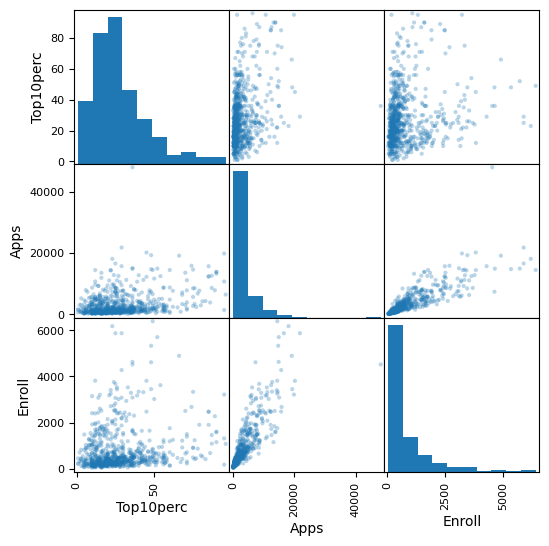

In [18]:
pd.plotting.scatter_matrix(df_college[['Top10perc', 'Apps', 'Enroll']], figsize=(6, 6), alpha=0.3)
plt.show()


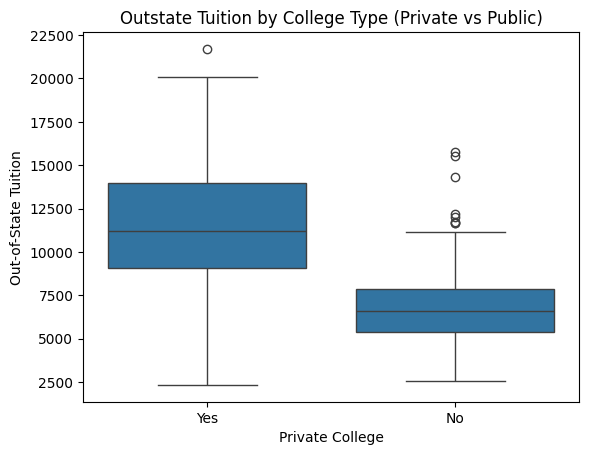

In [20]:
sns.boxplot(x='Private', y='Outstate', data=df_college)
plt.title('Outstate Tuition by College Type (Private vs Public)')
plt.xlabel('Private College')
plt.ylabel('Out-of-State Tuition')
plt.show()

C:\Users\tranv\AppData\Local\Temp\ipykernel_18176\1597811379.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Private College')


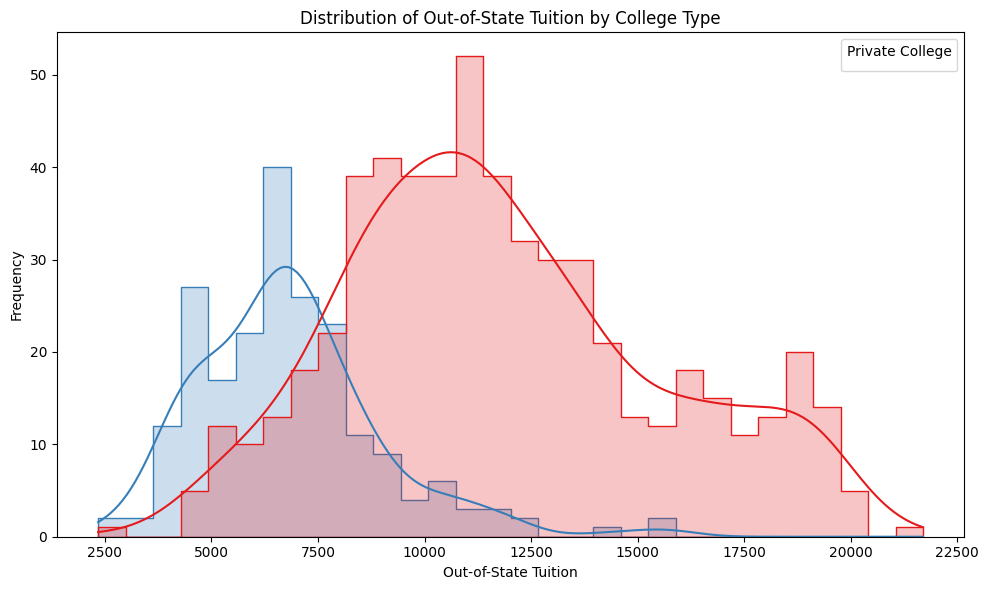

In [21]:

plt.figure(figsize=(10, 6))

# Draw histogram + KDE
sns.histplot(
    data=df_college,
    x='Outstate',
    hue='Private',         # Separate by Private vs Public
    kde=True,              # Add kernel density estimate
    bins=30,               # Number of histogram bins
    palette='Set1',        # Color palette
    element='step'         # Step-style histogram
)

plt.title('Distribution of Out-of-State Tuition by College Type')
plt.xlabel('Out-of-State Tuition')
plt.ylabel('Frequency')
plt.legend(title='Private College')
plt.tight_layout()
plt.show()


In [22]:
# create a elite column
df_college['Elite'] = df_college['Top10perc'].apply(lambda x: 'Yes' if x > 50 else 'No')

In [24]:
df_college['Elite'].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64

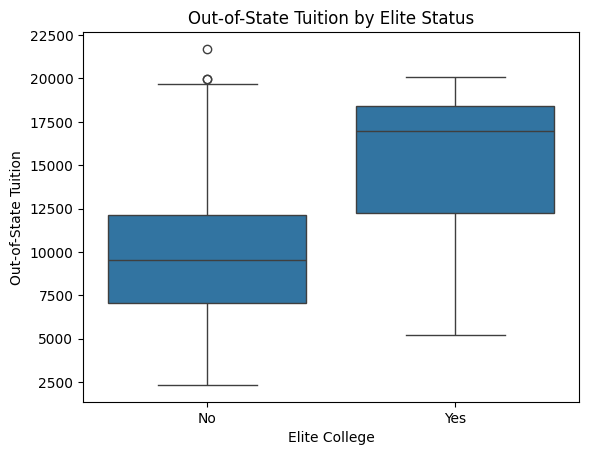

In [27]:
sns.boxplot(x='Elite', y='Outstate', data=df_college)
plt.title('Out-of-State Tuition by Elite Status')
plt.xlabel('Elite College')
plt.ylabel('Out-of-State Tuition')
plt.show()

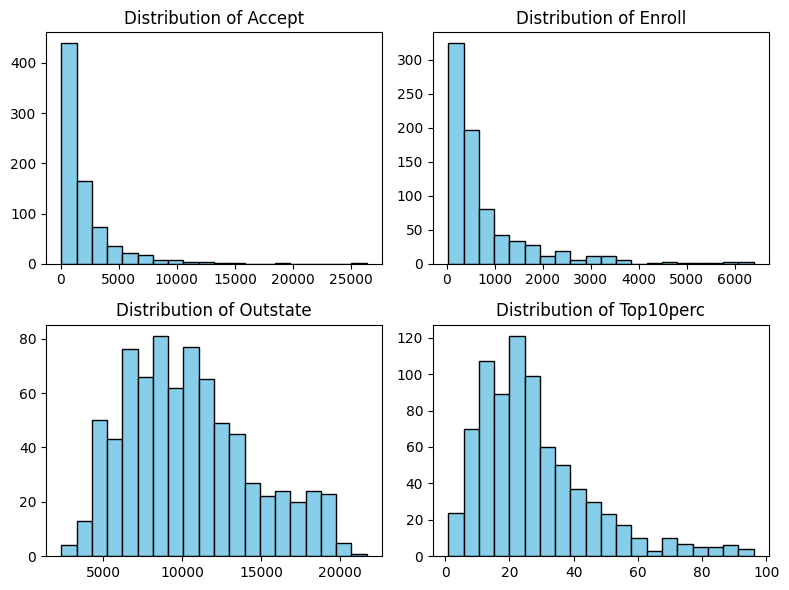

In [37]:
fig = plt.figure(figsize=(8,6))
variables = ['Accept','Enroll','Outstate','Top10perc']

for i in range(4):
    ax= fig.add_subplot(2,2,i+1)
    ax.hist(df_college[variables[i]],bins=20,color='skyblue',edgecolor='black')
    ax.set_title(f'Distribution of {variables[i]}')
plt.tight_layout()
plt.show()